In [0]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [0]:
MedData = pd.read_csv('insurance.csv')
MedData.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploratory Data Analysis


In [0]:
MedData.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [0]:
MedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [0]:
MedData["weight_condition"] = np.nan
lst = [MedData]

for col in lst:
    col.loc[col["bmi"] < 18.5, "weight_condition"] = "Underweight"
    col.loc[(col["bmi"] >= 18.5) & (col["bmi"] < 24.986), "weight_condition"] = "Normal Weight"
    col.loc[(col["bmi"] >= 25) & (col["bmi"] < 29.926), "weight_condition"] = "Overweight"
    col.loc[col["bmi"] >= 30, "weight_condition"] = "Obese"
    
MedData.head()

,age,sex,bmi,children,smoker,region,charges,weight_condition
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal Weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


In [0]:
MedData['age_cat'] = np.nan
lst = [MedData]

for col in lst:
    col.loc[(col['age'] >= 18) & (col['age'] <= 35), 'age_cat'] = 'Young Adult'
    col.loc[(col['age'] > 35) & (col['age'] <= 55), 'age_cat'] = 'Senior Adult'
    col.loc[col['age'] > 55, 'age_cat'] = 'Elder'
    
MedData.head()

,age,sex,bmi,children,smoker,region,charges,weight_condition,age_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,Young Adult
1,18,male,33.770,1,no,southeast,1725.55230,Obese,Young Adult
2,28,male,33.000,3,no,southeast,4449.46200,Obese,Young Adult
3,33,male,22.705,0,no,northwest,21984.47061,Normal Weight,Young Adult
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,Young Adult


In [0]:
charge_avg = MedData["charges"].mean()

MedData["charge_status"] = np.nan
lst = [MedData]


for col in lst:
    col.loc[col["charges"] > charge_avg, "charge_status"] = "Above Average"
    col.loc[col["charges"] < charge_avg, "charge_status"] = "Below Average"
    
MedData.head()

,age,sex,bmi,children,smoker,region,charges,weight_condition,age_cat,charge_status
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,Young Adult,Above Average
1,18,male,33.770,1,no,southeast,1725.55230,Obese,Young Adult,Below Average
2,28,male,33.000,3,no,southeast,4449.46200,Obese,Young Adult,Below Average
3,33,male,22.705,0,no,northwest,21984.47061,Normal Weight,Young Adult,Above Average
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,Young Adult,Below Average


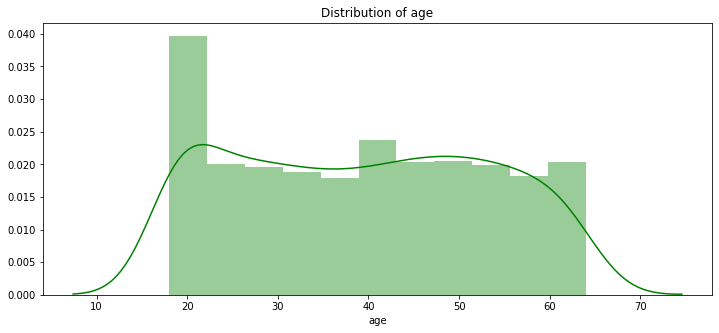

In [0]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sb.distplot(MedData["age"], color = 'g')


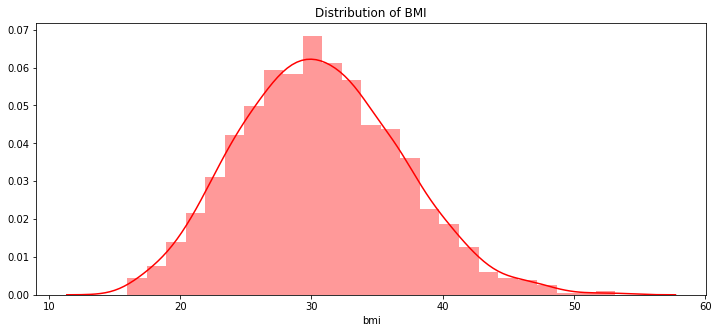

In [0]:
plt.figure(figsize=(12,5))
plt.title("Distribution of BMI")
ax = sb.distplot(MedData["bmi"], color = 'r')

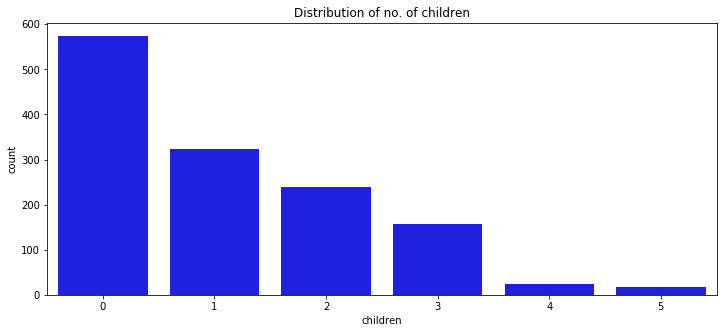

In [0]:
plt.figure(figsize=(12,5))
plt.title("Distribution of no. of children")
sb.countplot(MedData["children"], color = 'b')

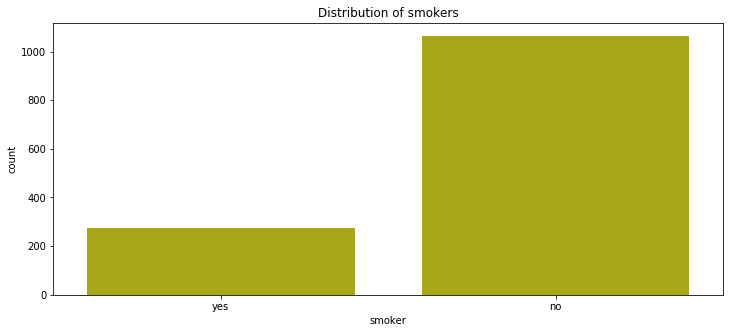

In [0]:
plt.figure(figsize=(12,5))
plt.title("Distribution of smokers")
sb.countplot(MedData["smoker"], color = 'y')

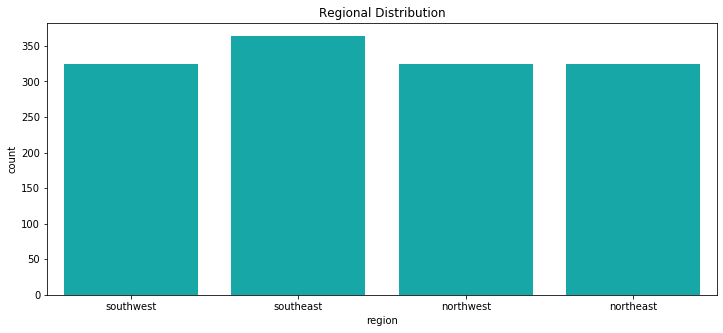

In [0]:
plt.figure(figsize=(12,5))
plt.title("Regional Distribution")
sb.countplot(MedData["region"], color = 'c')

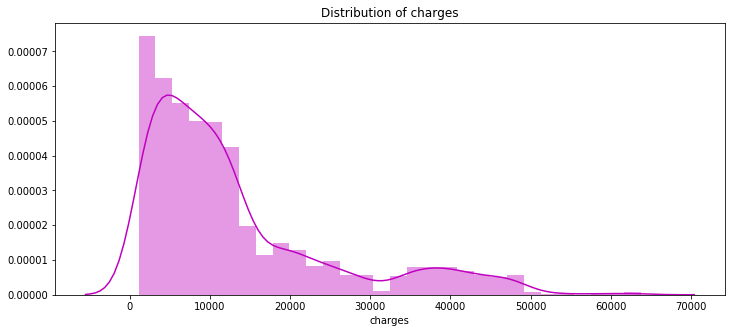

In [0]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges")
ax = sb.distplot(MedData["charges"], color = 'm')

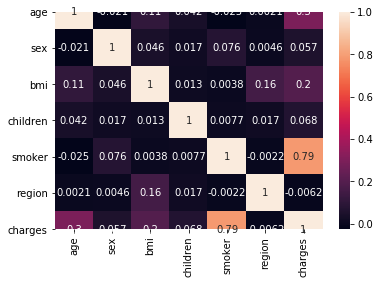

In [0]:
from sklearn.preprocessing import LabelEncoder
label_ = LabelEncoder ()
MedData['smoker']= label_.fit_transform(MedData['smoker'])
MedData['region']= label_.fit_transform(MedData['region'])
MedData['sex']= label_.fit_transform(MedData['sex'])

sb.heatmap(MedData.corr(), annot = True)

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

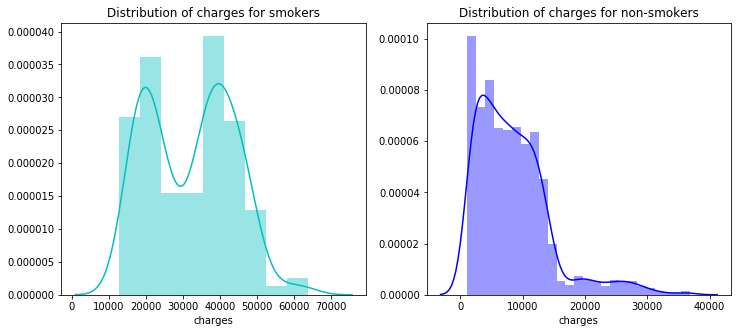

In [0]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sb.distplot(MedData[(MedData.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sb.distplot(MedData[(MedData.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

Text(0.5, 1.0, 'Distribution of charges for Elderly')

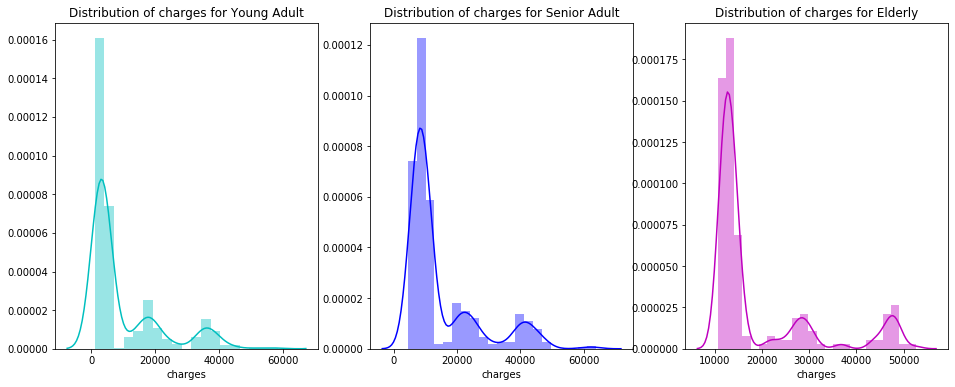

In [0]:
f= plt.figure(figsize=(16,6))

ax=f.add_subplot(131)
sb.distplot(MedData[(MedData.age_cat == "Young Adult")]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for Young Adult')

ax=f.add_subplot(132)
sb.distplot(MedData[(MedData.age_cat == "Senior Adult")]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for Senior Adult')

ax=f.add_subplot(133)
sb.distplot(MedData[(MedData.age_cat == "Elder" )]['charges'],color='m',ax=ax)
ax.set_title('Distribution of charges for Elderly')

Text(0.5, 1.0, 'Distribution of charges for ow')

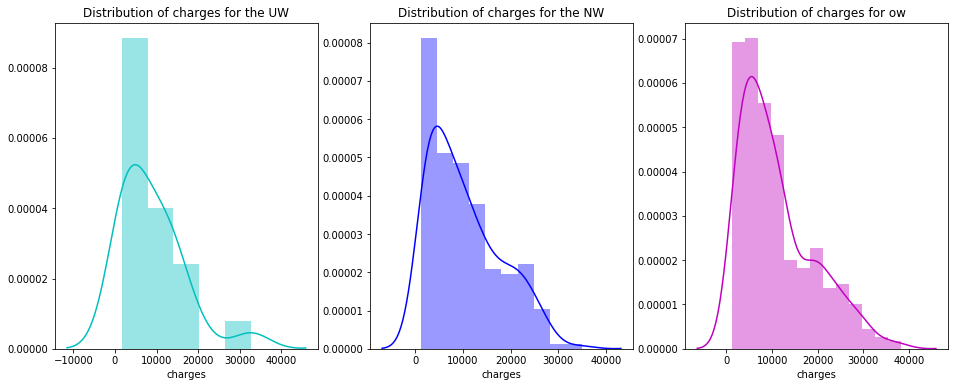

In [0]:
f= plt.figure(figsize=(16,6))

ax=f.add_subplot(131)
sb.distplot(MedData[(MedData.weight_condition == "Underweight")]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for the UW')

ax=f.add_subplot(132)
sb.distplot(MedData[(MedData.weight_condition == "Normal Weight")]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for the NW')

ax=f.add_subplot(133)
sb.distplot(MedData[(MedData.weight_condition == "Overweight" )]['charges'],color='m',ax=ax)
ax.set_title('Distribution of charges for ow')

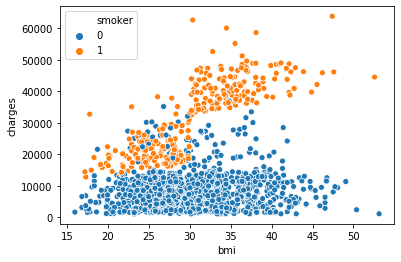

In [0]:
sb.scatterplot(x = 'bmi', y='charges', data = MedData, hue = 'smoker')

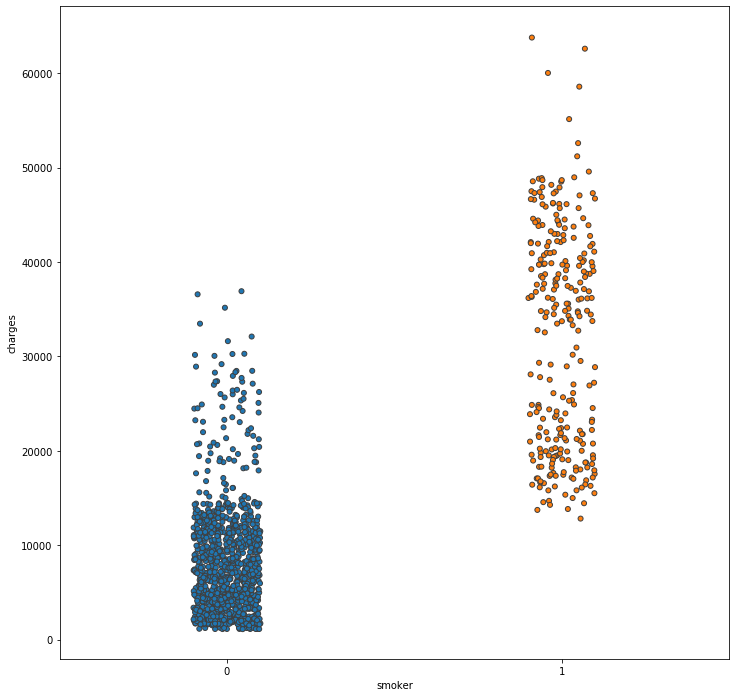

In [0]:
f,axes = plt.subplots(1,1, figsize=(12,12))
sb.stripplot(x="smoker", y="charges", data=MedData, linewidth=1)

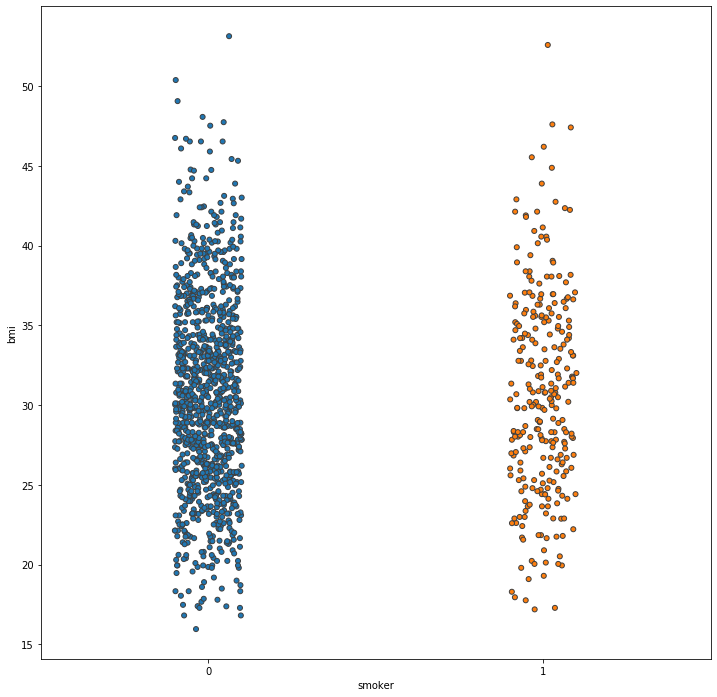

In [0]:
f,axes = plt.subplots(1,1, figsize=(12,12))
sb.stripplot(x="smoker", y="bmi", data=MedData, linewidth=1)

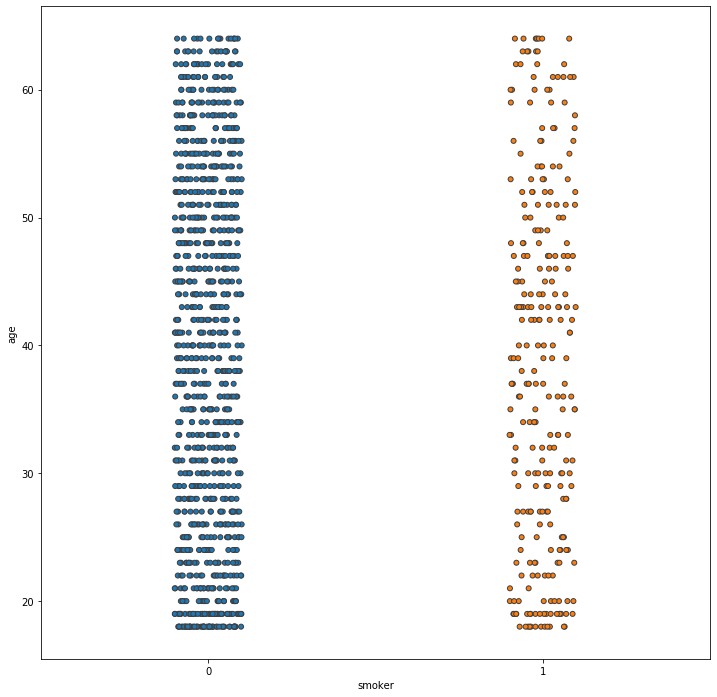

In [0]:
f,axes = plt.subplots(1,1, figsize=(12,12))
sb.stripplot(x="smoker", y="age", data=MedData, linewidth=1)

0    1064
1     274
Name: smoker, dtype: int64

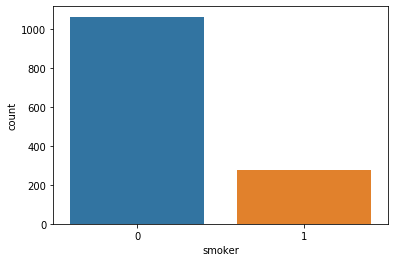

In [0]:
from sklearn.preprocessing import LabelEncoder
label_ = LabelEncoder ()
MedData['smoker']= label_.fit_transform(MedData['smoker'])

sb.countplot(MedData['smoker'])
MedData['smoker'].value_counts()

# Linear Regression

In [0]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

In [0]:
bmi = pd.DataFrame(MedData['bmi'])
chs = pd.DataFrame(MedData['charges'])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bmi, chs, test_size = 0.25)

print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (1003, 1) (1003, 1)
Test set:  (335, 1) (335, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



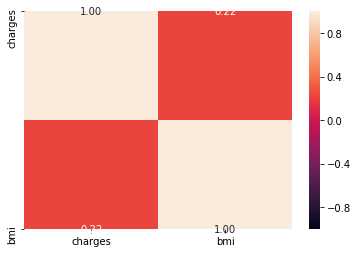

In [0]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([y_train, X_train], axis = 1, join_axes = [X_train.index])

# Calculate the correlation between the two columns/variables
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [0]:
#Correlation between bmi and charges
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficient \t: a = ', linreg.coef_)

Intercept 	: b =  [-315.62611347]
Coefficient 	: a =  [[448.26495273]]


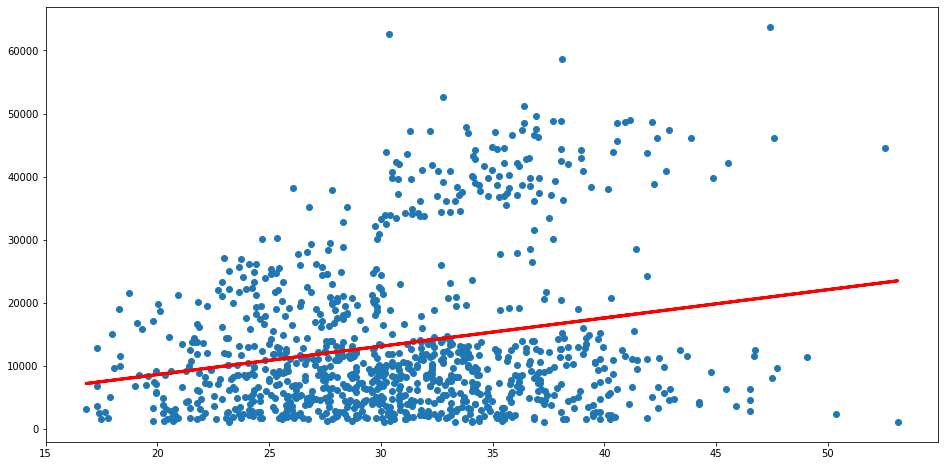

In [0]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

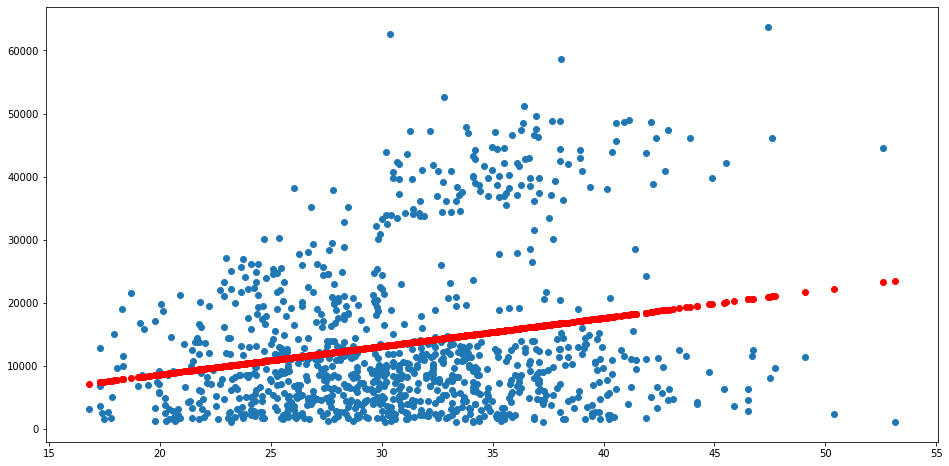

In [0]:
# Proving above is correct using predict
y_train_pred = linreg.predict(X_train)

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_train_pred, color = "r")
plt.show()

In [0]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.049785739502038684
Mean Squared Error (MSE) 	: 142671684.44875875
Root Mean Squared Error (RMSE) 	: 11944.52529189665


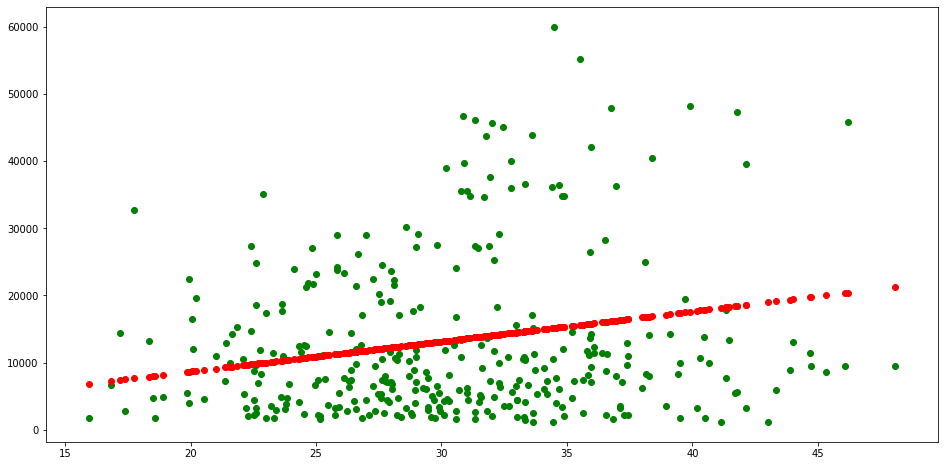

In [0]:
# Predict Total values corresponding to HP Test
y_test_pred = linreg.predict(X_test)

# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

In [0]:
print("Regression Accuracy of Train Dataset\t:", linreg.score(X_train, y_train))
print()
print("Regression Accuracy Test Dataset\t:", linreg.score(X_test, y_test))

Regression Accuracy of Train Dataset	: 0.049785739502038684

Regression Accuracy Test Dataset	: -0.0030287775338251333


# Logistic Regression

In [0]:
# Import LogisticRegression model from Scikit-Learn
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression object
logreg = LogisticRegression()

In [0]:
#converting yes-->1 and no-->0
from sklearn.preprocessing import LabelEncoder
from sklearn import utils

label = LabelEncoder()
MedData['smoker'] = label.fit_transform(MedData['smoker'])

In [0]:
smk = pd.DataFrame(MedData['smoker'])
smk.head()

,smoker
0,1
1,0
2,0
3,0
4,0


In [0]:
#change charges to A instead of X to not confuse between linear and logistic regression
A_train, A_test, b_train, b_test = train_test_split(chs, smk, test_size = 0.25) #smk the y to predict

print('Train set: ', A_train.shape, b_train.shape)
print('Test set: ', A_test.shape, b_test.shape)

Train set:  (1003, 1) (1003, 1)
Test set:  (335, 1) (335, 1)


In [0]:
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(A_train, b_train)

b_train_pred = logreg.predict(A_train)
b_test_pred = logreg.predict(A_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Classification Accuracy of Train Dataset	: 0.8993020937188435

Classification Accuracy Test Dataset		: 0.9074626865671642



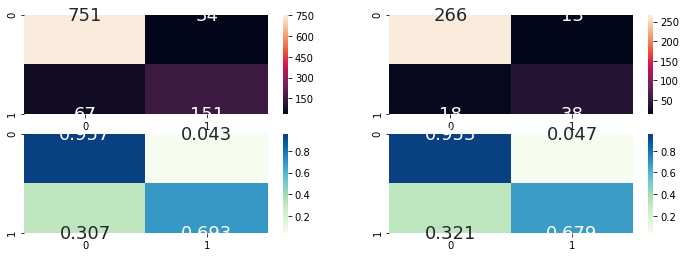

In [0]:
from sklearn.metrics import confusion_matrix

print("Classification Accuracy of Train Dataset\t:", logreg.score(A_train, b_train))
print()
print("Classification Accuracy Test Dataset\t\t:", logreg.score(A_test, b_test))
print()

cmn2_train = confusion_matrix(b_train, b_train_pred)
cmn2_train = cmn2_train.astype('float') / cmn2_train.sum(axis=1)[:, np.newaxis]

cmn2_test = confusion_matrix(b_test, b_test_pred)
cmn2_test = cmn2_test.astype('float') / cmn2_test.sum(axis=1)[:, np.newaxis]

f, axes = plt.subplots(2, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(b_train, b_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0,0])
sb.heatmap(confusion_matrix(b_test, b_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0,1])
sb.heatmap(cmn2_train, annot = True,fmt=".3f", annot_kws={"size": 18}, ax = axes[1,0], cmap = 'GnBu')
sb.heatmap(cmn2_test, annot = True, fmt=".3f", annot_kws={"size": 18},ax = axes[1,1], cmap = 'GnBu')

# Neural Network with Keras

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
predictors = ['age', 'bmi', 'children', 'charges']

P = MedData[predictors]
q = MedData.smoker

q_encoded = keras.utils.to_categorical(q, dtype=int)

P_train = P[:1003]
P_test = P[1003:]
q_train = q[:1003]
q_test = q[1003:]
q_encoded_train = q_encoded[:1003]
q_encoded_test = q_encoded[1003:]

In [0]:
model = keras.Sequential([
    keras.layers.BatchNormalization(input_shape = (len(predictors),) ),
    keras.layers.Dense(40,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(40,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(2, activation='softmax')                     
],)

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 4)                 16        
_________________________________________________________________
dense (Dense)                (None, 40)                200       
_________________________________________________________________
batch_normalization_1 (Batch (None, 40)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 40)                1640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 40)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 82        
Total params: 2,258
Trainable params: 2,0

In [0]:
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy']
  )

model.fit(P_train, q_encoded_train, epochs=30, batch_size=64)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1003 samples
Epoch 1/30
1003/1003 [==============================] - 1s 635us/sample - loss: 0.7495 - acc: 0.6251
Epoch 2/30
1003/1003 [==============================] - 0s 40us/sample - loss: 0.3463 - acc: 0.9103
Epoch 3/30
1003/1003 [==============================] - 0s 33us/sample - loss: 0.2845 - acc: 0.9342
Epoch 4/30
1003/1003 [==============================] - 0s 32us/sample - loss: 0.2304 - acc: 0.9501
Epoch 5/30
1003/1003 [==============================] - 0s 32us/sample - loss: 0.2087 - acc: 0.9541
Epoch 6/30
1003/1003 [==============================] - 0s 36us/sample - loss: 0.1982 - acc: 0.9531
Epoch 7/30
1003/1003 [==============================] - 0s 35us/sample - loss: 0.1700 - acc: 0.9591
Epoch 8/30
1003/1003 [==============================] - 0s 34us/sample - loss: 0.1649 - acc: 0.9591
Epoch 9/30
1003/1003 [==============================] - 0s 38us/sample - loss: 0.16

1003/1003 [==============================] - 0s 74us/sample - loss: 0.0633 - acc: 0.9781
Train data accuracy: 97.806579%
335/335 [==============================] - 0s 36us/sample - loss: 0.1050 - acc: 0.9403
Test data accuracy : 94.029850%


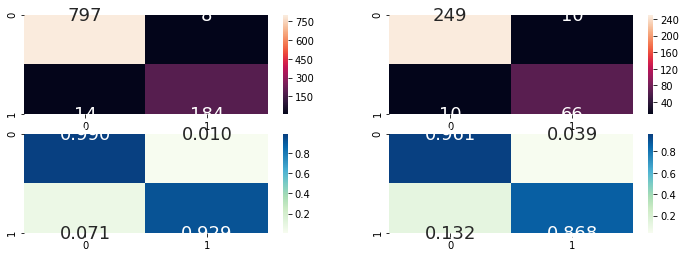

In [0]:
q_train_pred = model.predict_classes(P_train)
q_test_pred = model.predict_classes(P_test)

cmn3_train = confusion_matrix(q_train, q_train_pred)
cmn3_train = cmn3_train.astype('float') / cmn3_train.sum(axis=1)[:, np.newaxis]

cmn3_test = confusion_matrix(q_test, q_test_pred)
cmn3_test = cmn3_test.astype('float') / cmn3_test.sum(axis=1)[:, np.newaxis]

f, axes = plt.subplots(2, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(q_train, q_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0,0])
sb.heatmap(confusion_matrix(q_test, q_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0,1])
sb.heatmap(cmn3_train, annot = True,fmt=".3f", annot_kws={"size": 18}, ax = axes[1,0], cmap = 'GnBu')
sb.heatmap(cmn3_test, annot = True, fmt=".3f", annot_kws={"size": 18},ax = axes[1,1], cmap = 'GnBu')

print("Train data accuracy: {:f}%".format(model.evaluate(P_train, q_encoded_train)[1] * 100) )
print("Test data accuracy : {:f}%".format(model.evaluate(P_test, q_encoded_test)[1] * 100) )

# Decission Tree Classifier

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9322033898305084

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9223880597014925



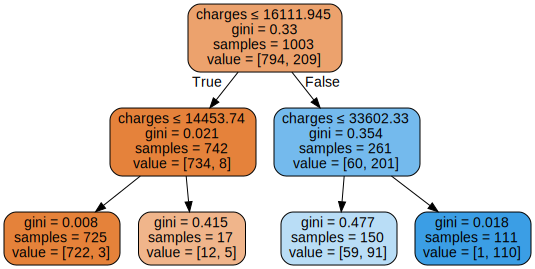

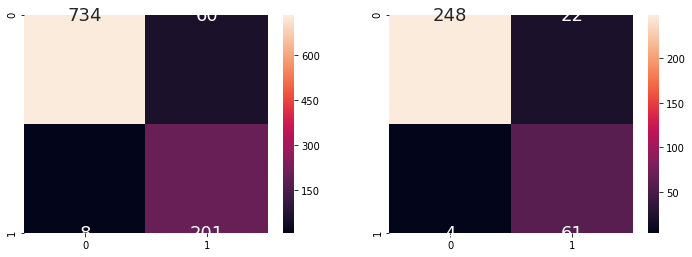

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

smoker = pd.DataFrame(MedData['smoker'])   
charges = pd.DataFrame(MedData['charges'])       

X_train, X_test, y_train, y_test = train_test_split(charges, smoker, test_size = 0.25)

dectree = DecisionTreeClassifier(max_depth = 2)  
dectree.fit(X_train, y_train)                    

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

treedot = export_graphviz(dectree,                                     
                          feature_names = X_train.columns,             
                          out_file = None,                               
                          filled = True,                               
                          rounded = True,                               
                          special_characters = True)                    

graphviz.Source(treedot)

# Random Forrest Classification


In [0]:
from sklearn.model_selection import train_test_split

X = MedData.drop(columns = ['smoker','children','region','weight_condition','age_cat','charge_status'])
y = MedData['smoker']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [0]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500, max_features = 2)
rfc.fit(X_train_scaled, y_train)

predict_train = rfc.predict(X_train_scaled)
predict_test = rfc.predict(X_test_scaled)


         Gini-importance
charges         0.815435
bmi             0.121866
age             0.056313
sex             0.006386


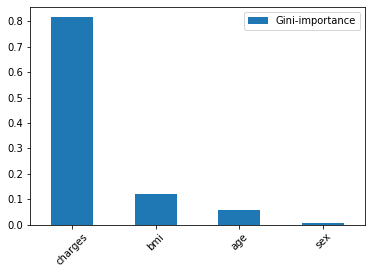

In [0]:
X_train = pd.DataFrame(X_train)

feats = {}
for feature, importance in zip(X_train.columns, rfc.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance',ascending=False).plot(kind='bar', rot=45)
print(importances.sort_values(by='Gini-importance',ascending=False))
plt.show()

Goodness of Fit of Model 	Train Dataset
Accuracy score on train dataset :  1.0

Goodness of Fit of Model 	Test Dataset
Accuracy score on test dataset :  0.9701492537313433



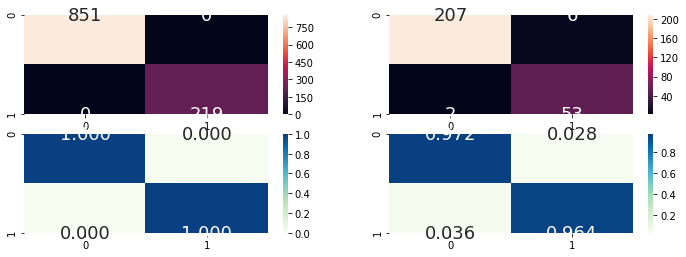

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Goodness of Fit of Model \tTrain Dataset")
print('Accuracy score on train dataset : ', accuracy_score(y_train,predict_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print('Accuracy score on test dataset : ', accuracy_score(y_test,predict_test))
print()


cmn_train = confusion_matrix(y_train,predict_train)
cmn_train = cmn_train.astype('float') / cmn_train.sum(axis=1)[:, np.newaxis]

cmn_test = confusion_matrix(y_test,predict_test)
cmn_test = cmn_test.astype('float') / cmn_test.sum(axis=1)[:, np.newaxis]

f, axes = plt.subplots(2, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train,predict_train), annot = True,fmt=".0f", annot_kws={"size": 18}, ax = axes[0,0])
sb.heatmap(confusion_matrix(y_test,predict_test), annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[0,1])
sb.heatmap(cmn_train, annot = True,fmt=".3f", annot_kws={"size": 18}, ax = axes[1,0], cmap = 'GnBu')
sb.heatmap(cmn_test, annot = True, fmt=".3f", annot_kws={"size": 18},ax = axes[1,1], cmap = 'GnBu')

In [0]:
from sklearn.tree import export_graphviz
import pydot

tree = rfc.estimators_[5]
feature_list = list(X_train.columns)

export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('tree.dot')

graph.write_png('tree.png');

# Gaussian Naive Bayers Classification

normal index of charges =  7.019807901276197e-74
normal index of log_chrg =  3.5703676381337117e-12


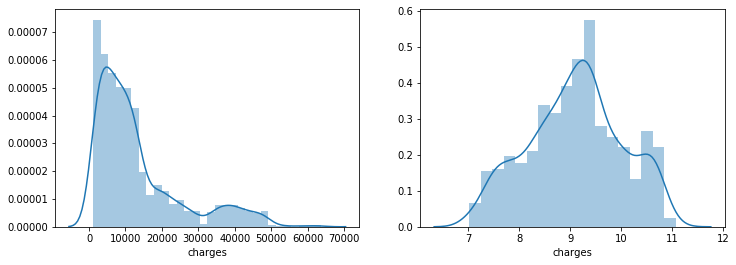

In [0]:
log_chrg = np.log(MedData['charges'])
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.distplot(MedData['charges'],ax = axes[0])
sb.distplot(log_chrg, ax = axes [1])

from scipy.stats import normaltest


k2, p = normaltest(MedData["charges"])
print("normal index of charges = ",p)

k2, p = normaltest(log_chrg)
print("normal index of log_chrg = ",p)

In [0]:
from sklearn.model_selection import train_test_split

X = pd.DataFrame(log_chrg)
y = MedData['smoker']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Goodness of Fit of Model 	Train Dataset
Accuracy score on train dataset :  0.9018691588785047

Goodness of Fit of Model 	Test Dataset
Accuracy score on test dataset :  0.9216417910447762



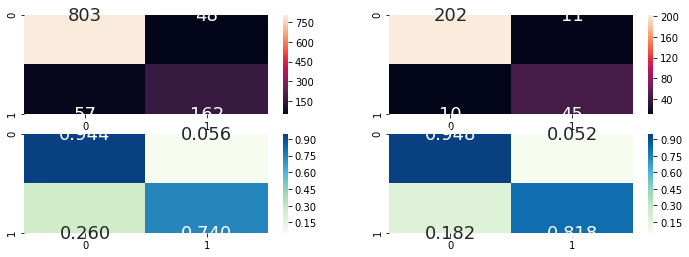

In [0]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train,y_train)

predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print('Accuracy score on train dataset : ', accuracy_score(y_train,predict_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print('Accuracy score on test dataset : ', accuracy_score(y_test,predict_test))
print()

cmn_train = confusion_matrix(y_train,predict_train)
cmn_train = cmn_train.astype('float') / cmn_train.sum(axis=1)[:, np.newaxis]

cmn_test = confusion_matrix(y_test,predict_test)
cmn_test = cmn_test.astype('float') / cmn_test.sum(axis=1)[:, np.newaxis]

f, axes = plt.subplots(2, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train,predict_train), annot = True,fmt=".0f", annot_kws={"size": 18}, ax = axes[0,0])
sb.heatmap(confusion_matrix(y_test,predict_test), annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[0,1])
sb.heatmap(cmn_train, annot = True,fmt=".3f", annot_kws={"size": 18}, ax = axes[1,0], cmap = 'GnBu')
sb.heatmap(cmn_test, annot = True, fmt=".3f", annot_kws={"size": 18},ax = axes[1,1], cmap = 'GnBu')

# Bernoulli Naive Bayes Classification

In [0]:
from sklearn.model_selection import train_test_split

dat_dum = pd.get_dummies(MedData)
dat_dum = dat_dum.drop(columns = ['bmi','children','region','age','charges'])

X = dat_dum.drop(columns = 'smoker' )
y = dat_dum['smoker']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Goodness of Fit of Model 	Train Dataset
Accuracy score on train dataset :  0.8869158878504673

Goodness of Fit of Model 	Test Dataset
Accuracy score on test dataset :  0.8992537313432836



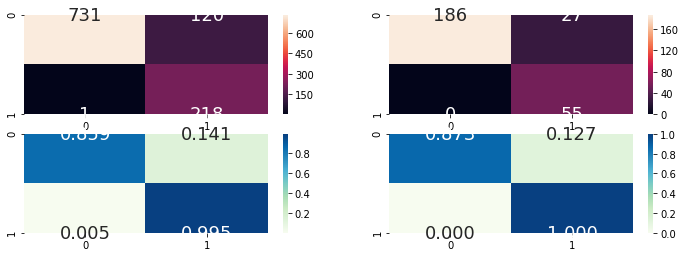

In [0]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()

model.fit(X_train,y_train)

predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print('Accuracy score on train dataset : ', accuracy_score(y_train,predict_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print('Accuracy score on test dataset : ', accuracy_score(y_test,predict_test))
print()

cmn_train = confusion_matrix(y_train,predict_train)
cmn_train = cmn_train.astype('float') / cmn_train.sum(axis=1)[:, np.newaxis]

cmn_test = confusion_matrix(y_test,predict_test)
cmn_test = cmn_test.astype('float') / cmn_test.sum(axis=1)[:, np.newaxis]

f, axes = plt.subplots(2, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train,predict_train), annot = True,fmt=".0f", annot_kws={"size": 18}, ax = axes[0,0])
sb.heatmap(confusion_matrix(y_test,predict_test), annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[0,1])
sb.heatmap(cmn_train, annot = True,fmt=".3f", annot_kws={"size": 18}, ax = axes[1,0], cmap = 'GnBu')
sb.heatmap(cmn_test, annot = True, fmt=".3f", annot_kws={"size": 18},ax = axes[1,1], cmap = 'GnBu')